In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Core Data & Math Library

import numpy as np # For General Math Library
import pandas as pd # For Data Manipulation

%matplotlib inline

import matplotlib.pyplot as plt # For Plotting
import seaborn as sns # For Plotting

#Scikit-learn: Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

#Scikit-learn: Model Selection & Validation

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

#Scikit-learn: Preprocessing & Utility

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Scikit-learn: Models (Ensembles and Linear)
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Lasso, Ridge





In [5]:
# Read Data

loc_train_data = "/content/drive/MyDrive/home-data-for-ml-course/train.csv"

train_data_frame = pd.read_csv(loc_train_data)

#__________________________________________________________________________#

train_data_frame.head() #Visualize the data



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train_data_frame['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_data_frame.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Select categorical and numeric features
categorical_features = train_data_frame.select_dtypes(include=['object']).columns
numeric_features = train_data_frame.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

# Encode categorical features temporarily as category codes
df_encoded = train_data_frame[categorical_features].apply(lambda x: x.astype('category').cat.codes)

# Compute mutual information between each categorical feature and target
mi_scores = mutual_info_regression(df_encoded, train_data_frame['SalePrice'])

# Convert to series for easy viewing
mi_scores = pd.Series(mi_scores, index=categorical_features).sort_values(ascending=False)

print("Mutual Information Scores:\n", mi_scores)

Mutual Information Scores:
 Neighborhood     0.512675
ExterQual        0.340210
KitchenQual      0.333975
BsmtQual         0.321670
GarageFinish     0.268659
FireplaceQu      0.215950
Foundation       0.198632
GarageType       0.191841
Exterior2nd      0.163321
HeatingQC        0.163268
BsmtFinType1     0.149371
Exterior1st      0.137171
MSZoning         0.124846
MasVnrType       0.098236
SaleCondition    0.091891
BsmtExposure     0.083197
LotShape         0.081712
CentralAir       0.080003
HouseStyle       0.071636
SaleType         0.069908
GarageQual       0.066448
Electrical       0.065644
GarageCond       0.054013
PavedDrive       0.045406
BldgType         0.041974
BsmtCond         0.041065
Fence            0.040831
LandContour      0.034637
BsmtFinType2     0.033865
RoofStyle        0.031569
Alley            0.023118
LotConfig        0.015917
Utilities        0.015688
Functional       0.014483
Condition1       0.012931
Heating          0.011175
ExterCond        0.008569
MiscFeatur

In [10]:
#selecting top categorical features with mutual relationships to sales price

top_cat_features = mi_scores[mi_scores > 0.01].index.tolist()  # threshold can be tuned
print("Selected High-Impact Categorical Features:", top_cat_features)

Selected High-Impact Categorical Features: ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType', 'Exterior2nd', 'HeatingQC', 'BsmtFinType1', 'Exterior1st', 'MSZoning', 'MasVnrType', 'SaleCondition', 'BsmtExposure', 'LotShape', 'CentralAir', 'HouseStyle', 'SaleType', 'GarageQual', 'Electrical', 'GarageCond', 'PavedDrive', 'BldgType', 'BsmtCond', 'Fence', 'LandContour', 'BsmtFinType2', 'RoofStyle', 'Alley', 'LotConfig', 'Utilities', 'Functional', 'Condition1', 'Heating']


In [11]:
# Detect column types
numeric_features = train_data_frame.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = train_data_frame.select_dtypes(include=['object']).columns
categorical_features = train_data_frame[top_cat_features].columns


print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)
print("Total Features:", len(numeric_features) + len(categorical_features))

new_train_data_frame = train_data_frame[numeric_features.tolist() + categorical_features.tolist()] # Slected few of the categories based on mutuality

print("New Data Frame Shape:", new_train_data_frame.shape)

print("New Data Frame Columns:", new_train_data_frame.info)


Numeric Features: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Features: Index(['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish',
       'FireplaceQu', 'Foundation', 'GarageType', 'Exterior2nd', 'HeatingQC',
       'BsmtFinType1', 'Exterior1st', 'MSZoning', 'MasVnrType',
       'SaleCondition', 'BsmtExposure', 'LotShape', 'CentralAir', 'HouseStyle',
       'SaleType', 'GarageQual', 'Electrical', 'GarageCond', 

In [12]:

# Define transformations
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Fill missing numeric values with mean
    ('scaler', StandardScaler())                   # Scale numerics i.e. standardize the data where mean tends to 0 and StandDevia = 1
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing categorical values with the most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))   # Encode categoricals
])


In [13]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformation
df_transformed = preprocessor.fit_transform(new_train_data_frame)

# Get feature names after OneHotEncoding

encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
final_columns = list(numeric_features) + list(encoded_feature_names)

print("Final Column Names:\n", final_columns)
print("Number of Final Columns:", len(final_columns))

# Convert the transformed array back to a DataFrame
df_transformed_train_data = pd.DataFrame(df_transformed, columns=final_columns)

print("\nTransformed Numeric DataFrame:\n", df_transformed_train_data.head())


Final Column Names:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborh

In [14]:
# How categorical values get exploded after one hot encoding
encoder = preprocessor.named_transformers_['cat']['encoder']

encoded_feature_names = encoder.get_feature_names_out(categorical_features)

pd.Series(encoded_feature_names).str.extract(r'^([^_]+)_')[0].value_counts()

0
Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
HouseStyle        8
Functional        7
GarageType        6
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Foundation        6
Heating           6
GarageCond        5
LotConfig         5
BldgType          5
FireplaceQu       5
MSZoning          5
HeatingQC         5
GarageQual        5
Electrical        5
ExterQual         4
KitchenQual       4
BsmtQual          4
LotShape          4
BsmtCond          4
BsmtExposure      4
LandContour       4
Fence             4
GarageFinish      3
MasVnrType        3
PavedDrive        3
CentralAir        2
Alley             2
Utilities         2
Name: count, dtype: int64

In [ ]:
# Display Outliers

def outlier_detection_vs_price(df):
    salePriceCol = 'SalePrice'

    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    if salePriceCol in numerical_cols:
        numerical_cols.remove(salePriceCol)

    no_cols = len(numerical_cols)
    ncols = 2
    nrows = int(np.ceil(no_cols / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 8 * nrows))
    axes = axes.flatten()

    for idx, col in enumerate(numerical_cols):
        # 2. Visualize the relationship
        sns.scatterplot(x=col, y='SalePrice', data=df, ax=axes[idx])
        axes[idx].set_title(f"Scatter: {col} vs. {salePriceCol} ")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(salePriceCol)
        axes[idx].grid(True)

    # 5. Adjust layout to prevent titles/labels from overlapping
    plt.tight_layout()

    # 6. Display the combined figure
    plt.show()


In [ ]:
outlier_detection_vs_price(df_transformed_train_data)

In [15]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

# most correlated features
corrmat = df_transformed_train_data.corr() # entire data

top_corr_features = corrmat.index[corrmat["SalePrice"] > 0.3]    #best feature selection from corr matrix


print(len(top_corr_features))
print(top_corr_features)

36
Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'ExterQual_Ex',
       'ExterQual_Gd', 'KitchenQual_Ex', 'KitchenQual_Gd', 'BsmtQual_Ex',
       'GarageFinish_Fin', 'Foundation_PConc', 'Exterior2nd_VinylSd',
       'HeatingQC_Ex', 'BsmtFinType1_GLQ', 'Exterior1st_VinylSd',
       'MasVnrType_Stone', 'SaleCondition_Partial', 'BsmtExposure_Gd',
       'SaleType_New'],
      dtype='object')


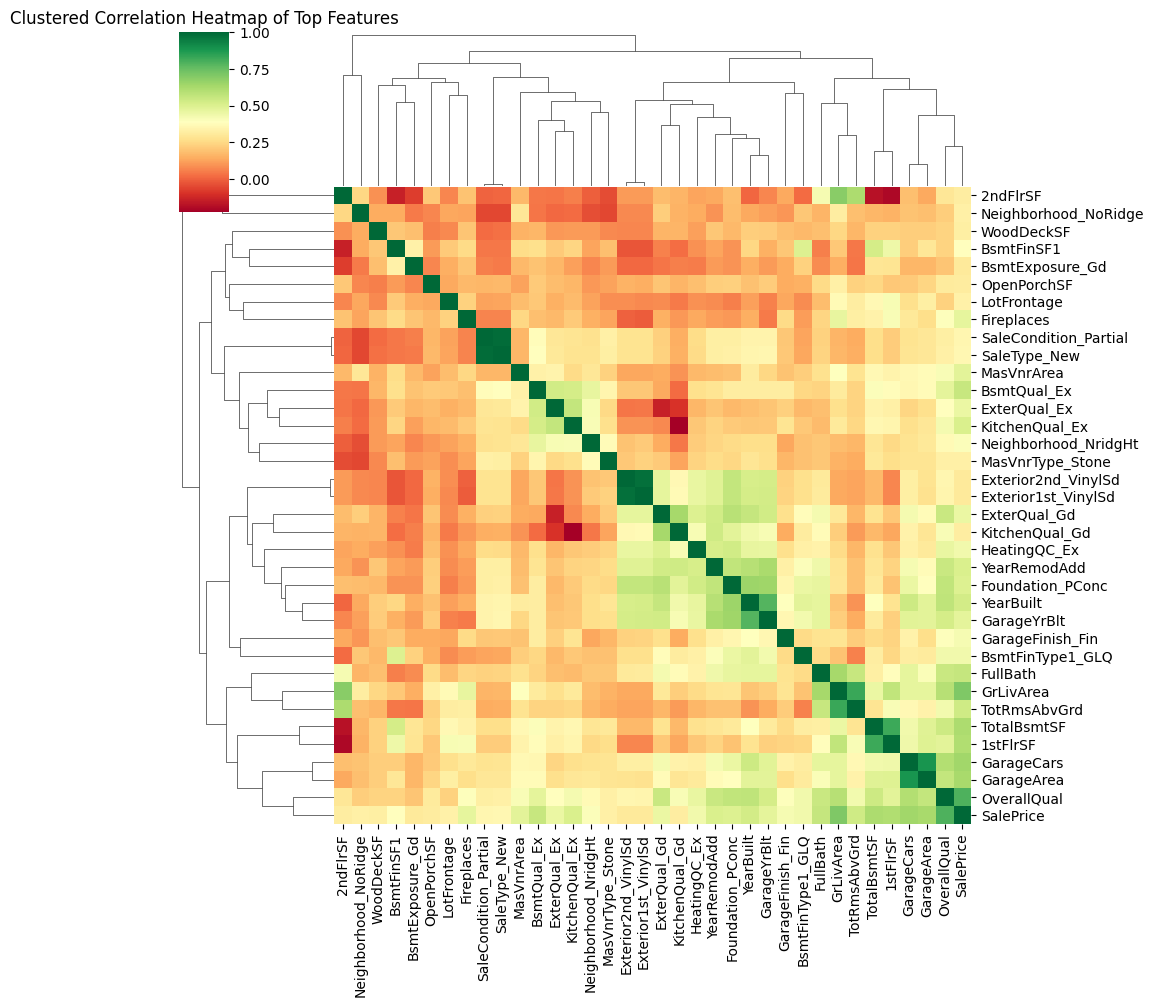

In [16]:
sns.clustermap(df_transformed_train_data[top_corr_features].corr(),
               cmap="RdYlGn", annot=False, figsize=(10,10))
plt.title("Clustered Correlation Heatmap of Top Features")
plt.show()

In [17]:
# 1. Compute correlation matrix
corrmat = df_transformed_train_data.corr()

# Select features with |r| > 0.5
#top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]

# Select features with correlation > 0.0 **and positive**
top_corr_features = corrmat.index[(corrmat["SalePrice"] > 0.3)] #best feature selection from corr matrix

# Remove 'SalePrice' itself
top_corr_features = top_corr_features.drop('SalePrice')

print("Highly correlated features (|r| > 0.5) excluding SalePrice:")
print(len(top_corr_features))
print(top_corr_features.tolist())

Highly correlated features (|r| > 0.5) excluding SalePrice:
35
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'KitchenQual_Ex', 'KitchenQual_Gd', 'BsmtQual_Ex', 'GarageFinish_Fin', 'Foundation_PConc', 'Exterior2nd_VinylSd', 'HeatingQC_Ex', 'BsmtFinType1_GLQ', 'Exterior1st_VinylSd', 'MasVnrType_Stone', 'SaleCondition_Partial', 'BsmtExposure_Gd', 'SaleType_New']


In [18]:
# Define the list of core features to keep. This list includes both numerical
# and categorical features that are highly predictive.
core_features = top_corr_features.tolist()

In [19]:
print("Total Features:", len(core_features))

Total Features: 35


In [20]:
# Check if the columns are missing from the dataframe after one hot encoding
missing_cols = [c for c in core_features if c not in df_transformed_train_data.columns]
print("Missing columns:", missing_cols)

Missing columns: []


In [21]:
print(df_transformed_train_data.shape)
print(df_transformed_train_data.describe)

(1460, 256)
<bound method NDFrame.describe of             Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.730865    0.073375    -0.229372 -0.207142     0.651479    -0.517200   
1    -1.728492   -0.872563     0.451936 -0.091886    -0.071836     2.179628   
2    -1.726120    0.073375    -0.093110  0.073480     0.651479    -0.517200   
3    -1.723747    0.309859    -0.456474 -0.096897     0.651479    -0.517200   
4    -1.721374    0.073375     0.633618  0.375148     1.374795    -0.517200   
...        ...         ...          ...       ...          ...          ...   
1455  1.721374    0.073375    -0.365633 -0.260560    -0.071836    -0.517200   
1456  1.723747   -0.872563     0.679039  0.266407    -0.071836     0.381743   
1457  1.726120    0.309859    -0.183951 -0.147810     0.651479     3.078570   
1458  1.728492   -0.872563    -0.093110 -0.080160    -0.795151     0.381743   
1459  1.730865   -0.872563     0.224833 -0.058112    -0.795151     0.381743   

     

In [22]:
# Pre processed dataframe with selected core features

X = df_transformed_train_data[core_features] # Selected Feature X
y = new_train_data_frame['SalePrice'] # Target y



In [23]:
print(X.shape)
print(X.describe())
#print(X.info)
#print(X.head)

(1460, 35)
        LotFrontage   OverallQual     YearBuilt  YearRemodAdd    MasVnrArea  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   4.075887e-16  1.387018e-16  1.046347e-15  4.496860e-15 -3.406712e-17   
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min   -2.227875e+00 -3.688413e+00 -3.287824e+00 -1.689368e+00 -5.744105e-01   
25%   -4.564744e-01 -7.951515e-01 -5.719226e-01 -8.656586e-01 -5.744105e-01   
50%    6.454645e-16 -7.183611e-02  5.737148e-02  4.425864e-01 -5.744105e-01   
75%    4.065156e-01  6.514792e-01  9.516316e-01  9.271216e-01  3.355252e-01   
max    1.103492e+01  2.821425e+00  1.282839e+00  1.217843e+00  8.289499e+00   

         BsmtFinSF1   TotalBsmtSF      1stFlrSF      2ndFlrSF     GrLivArea  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean  -2.433366e-17  2.457699e-16  6.509253e-17 -1.825024e-17 -1.277517e-16   
std    1.000343e+00  1.000343e+00  1.000

In [24]:
print(y.shape)
print(y.describe())
#print(y.info)
#print(y.head

(1460,)
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [26]:
# Split into validation and training data
train_X_raw, val_X_raw, train_y, val_y = train_test_split(X, y, random_state=1 )
print("Creating train / test split...")

Creating train / test split...


In [27]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Base models
base_models = [
    ('gbr', GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, max_features = 'sqrt', subsample =  1.0)),
    ('rfr', RandomForestRegressor(n_estimators=300, max_depth=10)),
    ('svr', SVR(kernel='rbf', C=100, epsilon=0.1)),
    ('lasso', Lasso(alpha=0.001))
]

# Meta (final) model - KRR
meta_model = KernelRidge(alpha=1.0, kernel='rbf')

# Stacking Regressor
stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # passes original features to meta-model
)

# Fit and evaluate
stack.fit(train_X_raw, train_y)
preds = stack.predict(val_X_raw)
mae = mean_absolute_error( val_y, preds)
print("Stacking MAE:", mae)

Stacking MAE: 176725.51232876713


##Gradient Boost Regressor
#Model 1
The individual model logic is as follows:

### Define the pipeline
( how to transform the data for the model)

*   instantiate baseline model
*   setup GridSearchCV and model param ranges to allow fine-tuning
*   train the model via GridSearch to learn the best params
*   Personal note on hyper-parameter tuning:

First started with learning rate and number of iterations / trees
i moved on to regularization params next

In [ ]:
# ===================================================================
# MODEL 1: GRADIENT BOOSTING REGRESSOR (GBR)
# ===================================================================

print("⏳ Starting GBR REGRESSOR")


from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)


⏳ Starting GBR REGRESSOR


In [ ]:
gbr.fit(train_X_raw, train_y)

GradientBoostingRegressor(learning_rate=0.05, max_features='sqrt',
                          n_estimators=1000, random_state=42, subsample=0.8)

In [ ]:

param_grid = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(train_X_raw, train_y)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 1.0}


In [ ]:
#val_predictions = gbr.predict(val_X_raw)
val_predictions = best_model.predict(val_X_raw)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#r2 = r2_score(val_y, val_predictions)
#rmse = np.sqrt(mean_squared_error(val_y, val_predictions))

mae_gbr = mean_absolute_error(val_y, val_predictions)


print("Mean Absolute Error:", mae_gbr)
#print("R² Score:", r2)
#print("RMSE:", rmse)

Mean Absolute Error: 16495.742410584397


##Cat Boost Regressor
###Model 2

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV

# ------------------------------
# Define the CatBoost Regressor
# ------------------------------
catboost_model = CatBoostRegressor(
    iterations=1000,          # analogous to n_estimators
    learning_rate=0.05,
    depth=3,                  # analogous to max_depth
    subsample=0.8,
    random_seed=42,
    verbose=0                 # silent output
)

# ------------------------------
# Define hyperparameter grid
# ------------------------------
param_grid = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.05, 0.1],
    'depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'l2_leaf_reg': [3, 5, 7],  # regularization parameter in CatBoost
    'border_count': [32, 64]   # number of splits for numerical features
}

# ------------------------------
# Setup GridSearchCV
# ------------------------------
grid_search = GridSearchCV(
    estimator=CatBoostRegressor(random_seed=42, verbose=0),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# ------------------------------
# Fit the model
# ------------------------------
grid_search.fit(train_X_raw, train_y)  # train_y can be unscaled for CatBoost

# ------------------------------
# Get best parameters and estimator
# ------------------------------
print("Best Parameters:", grid_search.best_params_)
best_model_cbr = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'border_count': 32, 'depth': 2, 'iterations': 1000, 'l2_leaf_reg': 7, 'learning_rate': 0.05, 'subsample': 1.0}


In [ ]:
#Cat Boost Predictions

val_predictions_cbr = best_model_cbr.predict(val_X_raw)

mae_cbr = mean_absolute_error(val_y, val_predictions_cbr)


print("Mean Absolute Error:", mae_cbr)


Mean Absolute Error: 16386.90967227993


In [ ]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# ------------------------------
# Define the XGBoost Regressor
# ------------------------------
xgb_model = XGBRegressor(
    n_estimators=1000,      # analogous to iterations
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,   # analogous to max_features in GBR
    random_state=42,
    verbosity=0
)

# ------------------------------
# Define hyperparameter grid
# ------------------------------
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 3, 5],   # L2 regularization
    'reg_alpha': [0, 1, 3]     # L1 regularization
}

# ------------------------------
# Setup GridSearchCV
# ------------------------------
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# ------------------------------
# Fit the model
# ------------------------------
grid_search.fit(train_X_raw, train_y)  # train_y can be unscaled

# ------------------------------
# Get best parameters and estimator
# ------------------------------
print("Best Parameters:", grid_search.best_params_)
best_model_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500, 'reg_alpha': 3, 'reg_lambda': 5, 'subsample': 0.8}


In [2]:
#XG Boost Predictions

val_predictions_xgb = best_model_xgb.predict(val_X_raw)

mae_xgb = mean_absolute_error(val_y, val_predictions_xgb)


print("Mean Absolute Error:", mae_xgb)


NameError: name 'best_model_xgb' is not defined

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

# ------------------------------
# Define Kernel Ridge Regressor
# ------------------------------
krr_model = KernelRidge(
    alpha=1.0,        # Regularization strength
    kernel='rbf',     # Radial Basis Function kernel
    gamma=None        # Kernel coefficient for rbf/poly/sigmoid
)

# ------------------------------
# Define hyperparameter grid
# ------------------------------
param_grid = {
    'alpha': [0.1, 0.9, 10.0],          # Regularization strength
    'kernel': ['linear', 'rbf', 'polynomial'],  # Kernel type
    'gamma': [0.01, 0.1, 1]             # Only used for 'rbf' and 'polynomial'
}

# ------------------------------
# Setup GridSearchCV
# ------------------------------
grid_search = GridSearchCV(
    estimator=KernelRidge(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',      # You can also use 'neg_mean_absolute_error'
    n_jobs=-1,
    verbose=2
)

# ------------------------------
# Fit the model
# ------------------------------
grid_search.fit(train_X_raw, train_y)  # train_y can be unscaled

# ------------------------------
# Get best parameters and estimator
# ------------------------------
print("Best Parameters:", grid_search.best_params_)
best_model_krr = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'alpha': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
#KRR Predictions

val_predictions_krr = best_model_krr.predict(val_X_raw)

mae_krr = mean_absolute_error(val_y, val_predictions_krr)


print("Mean Absolute Error:", mae_krr)

Mean Absolute Error: 15943.03459754939


## Ensemble Models Using Stacking Regressor

In [ ]:
#Base Models

# Kernel Ridge

krr = KernelRidge(
    alpha=1.0,
    kernel='rbf',
    gamma=0.01
)

# CatBoost

catboost = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=3,
    subsample=1.0,
    random_seed=42,
    border_count = 64,
    l2_leaf_reg = 7,
    verbose=0
)

# GradientBoost

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=1.0,
    max_features='sqrt',
    random_state=42
)


In [ ]:
# Creating meta model

#Simple linear model as meta-Learner

meta_model = Ridge(alpha=1.0)

In [ ]:
# Stacking Ensemble

stacked_model = StackingRegressor(
    estimators=[('krr', krr),('catboost', catboost)],
    final_estimator=meta_model,
    cv = 5, # 5 fold cv for out of fold predictions
    n_jobs=-1,
    passthrough=True # only base predictions for meta - model
)

In [ ]:
# Train the Stacked Model
stacked_model.fit(train_X_raw, train_y)

StackingRegressor(cv=5,
                  estimators=[('krr',
                               KernelRidge(alpha=1.0, gamma=0.01,
                                           kernel='rbf')),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7974799ef020>)],
                  final_estimator=Ridge(), n_jobs=-1, passthrough=True)

In [ ]:
# Predicting through the stacked model

val_predictions_stacked = stacked_model.predict(val_X_raw)

mae = mean_absolute_error(val_y, val_predictions_stacked)
r2 = r2_score(val_y, val_predictions_stacked)

print("Stacked Ensemble MAE:", mae)
print("Stacked Ensemble R²:", r2)

Stacked Ensemble MAE: 16863.957952065535
Stacked Ensemble R²: 0.8763562017412065


In [ ]:
# Creating Final Submission.csv File For Kaggle And Training on Entire Test Data

# Read Data

loc_test_data = "/content/drive/MyDrive/home-data-for-ml-course/test.csv"

test_data_frame = pd.read_csv(loc_test_data)

test_ids = test_data_frame['Id']

#__________________________________________________________________________#

test_data_frame.head() #Visualize the data



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [ ]:
# Making New Data Frame With Useful Features

numeric_features_test = test_data_frame.select_dtypes(include=[np.number]).columns
categorical_features_test = test_data_frame.select_dtypes(exclude=[np.number]).columns

# Combine preprocessing steps
preprocessor_test = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_test),
        ('cat', categorical_transformer, categorical_features_test)
    ])

# Apply transformation
df_transformed_test = preprocessor_test.fit_transform(test_data_frame)

print(df_transformed_test.shape)

# Get feature names after OneHotEncoding

encoded_feature_names_test = preprocessor_test.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features_test)

final_columns_test = list(numeric_features_test) + list(encoded_feature_names_test)

print(len(final_columns_test))

#Convert the transformed array back to a DataFrame
df_transformed_test_data = pd.DataFrame(df_transformed_test, columns=final_columns_test)

print(df_transformed_test_data.shape)

X_test = df_transformed_test_data[core_features]

print(X_test.shape)

(1459, 270)
270
(1459, 270)
(1459, 12)


In [ ]:
# Predict With Stacked Model

stacking_predictions_log = stacked_model.predict(X_test)

In [ ]:
print(stacking_predictions_log)

[117992.07907534 152019.55942571 172484.16721685 ... 156741.33353326
 115570.89092418 239600.646317  ]


In [ ]:
# --- Save Submission File ---
output = pd.DataFrame({
    'Id': test_ids, # Use the saved 'test_ids'
    'SalePrice': stacking_predictions_log
})
output.to_csv('submission.csv', index=False)